In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [24]:
w_h_data = pd.read_csv('raw_data/WHR_2005-2024.csv')
inf_data = pd.read_csv('raw_data/WHI_Inflation.csv')
life_data = pd.read_csv('raw_data/Life_expectancy.csv')
suicide_data = pd.read_csv('raw_data/Suicide_Rate.csv')
gci_data = pd.read_csv('raw_data/world_data_2023.csv')


Renamed/fixed the columns and sorted by year for world happiness dataframe.

In [25]:
w_h_data = w_h_data.rename(columns={
    'Log GDP per capita': 'GDP_per_capita',
    'Healthy life expectency at birth': 'Life_expectency',
    'Freedom to make life choices': 'Freedom_of_choice',
    'Life Ladder': 'happiness_score'
})
w_h_data
w_h_data_trans = w_h_data.T.reset_index()
w_h_data_trans['index'] = w_h_data_trans['index'].str.replace(' ', '_')
w_h_data_trans['index'] = w_h_data_trans['index'].map(str.lower)
w_h_data_trans

reset_w_h_data = w_h_data_trans.set_index('index').T
w_h_data = reset_w_h_data
w_h_data.round(2)
w_h_data

index,country_name,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_of_choice,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.72359,7.350416,0.450662,50.5,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.6139,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.77562,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.59605,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.29622,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.19135


Combined life/life expectancy and suidide rate dataframes into one dataframe. Renamed/fixed column names.

In [26]:
life_death_data = pd.merge(life_data, suicide_data, on='Country', how='outer')
life_death_data
life_death_data = life_death_data.rename(columns={
    'Life Expectancy (years) - Men': 'male_life_expectancy',
    'Life Expectancy (years) - Women': 'female_life_expectancy',
    'Fertility Rate (births per woman)': 'fertility_rate'
})
life_death_data

life_death_data_trans = life_death_data.T.reset_index()
life_death_data_trans['index'] = life_death_data_trans['index'].str.replace(' ', '_')
life_death_data_trans['index'] = life_death_data_trans['index'].map(str.lower)
life_death_data_trans

reset_life_death_data = life_death_data_trans.set_index('index').T
life_death_data = reset_life_death_data
life_death_data


index,country,male_life_expectancy,female_life_expectancy,happiness_score,fertility_rate,gdp_per_capita,suicide_rate
0,Afghanistan,60.6,68.2,3.794,4.7,"1,105",20.6
1,Albania,74.8,81.3,4.959,1.7,"4,932",32.4
2,Algeria,73.3,78.9,5.605,2.9,"4,534",15.6
3,Andorra,81.7,84.8,6.955,1.4,"46,622",18.9
4,Angola,58.1,65.6,4.105,5.3,"2,077",20.5
...,...,...,...,...,...,...,...
145,Switzerland,NaN,NaN,NaN,NaN,"83,832",12.9
146,Thailand,NaN,NaN,NaN,NaN,"6,792",27.8
147,United Arab Emirates,76.3,80.6,6.39,2.6,NaN,NaN
148,United Kingdom,79.0,83.0,6.72,1.7,"39,720",11.1


Dropping unneeded columns (already have in other data), fixed column names, sorted by year for inflation data.

In [27]:
inf_data = inf_data.drop(['Official Core Consumer Price Inflation', 'Headline Consumer Price Inflation', 'Producer Price Inflation', 'Continent/Region', 'Generosity','Perceptions of corruption', 'Healthy life expectancy at birth', 'Social support'], axis=1)

inf_data_trans = inf_data.T.reset_index()
inf_data_trans['index'] = inf_data_trans['index'].str.replace(' ', '_')
inf_data_trans['index'] = inf_data_trans['index'].map(str.lower)
inf_data_trans

reset_inf_data = inf_data_trans.set_index('index').T
inf_data = reset_inf_data

inf_data = inf_data.rename(columns={
    'energy_consumer_price_inflation': 'energy_inflation',
    'food_consumer_price_inflation': 'food_inflation',
    'gdp_deflator_index_growth_rate': 'gdp_deflator_index'
})

inf_data


index,country,year,energy_inflation,food_inflation,gdp_deflator_index,score,gdp_per_capita,freedom_to_make_life_choices
0,Afghanistan,2015,-4.25,-0.84,2.66509,3.575,0.31982,0.23414
1,Afghanistan,2016,2.07,5.67,-2.409509,3.36,0.38227,0.1643
2,Afghanistan,2017,4.44,6.94,2.404,3.794,0.401477,0.10618
3,Afghanistan,2018,1.474185,-1.045952,2.071208,3.632,0.332,0.085
4,Afghanistan,2019,-2.494359,3.79477,6.520928,3.203,0.35,0.0
...,...,...,...,...,...,...,...,...
1227,Zimbabwe,2019,90.808071,86.124371,-4.035235,3.663,0.366,0.361
1228,Zimbabwe,2020,306.431673,601.020236,568.971862,3.2992,0.425564,0.377405
1229,Zimbabwe,2021,69.82,105.8,113.294981,3.145,0.457,0.359
1230,Zimbabwe,2022,97.24655,149.967034,113.018434,2.995,0.947,0.329


In the following code, most NAN were changed to "No data" as I did not want to entirely remove information on countries due to them missing data from just a certain column as that would have been quite a bit of data loss on some of the datasets.

Removing NAN from inflation data

In [28]:
nan_count1 = inf_data.isnull().sum()
columns_to_fill1 = ['energy_inflation', 'food_inflation', 'gdp_deflator_index' ]
for col in columns_to_fill1:
    inf_data[col] = inf_data[col].fillna('No data')

nan_count1
inf_data.round(2)
inf_data


index,country,year,energy_inflation,food_inflation,gdp_deflator_index,score,gdp_per_capita,freedom_to_make_life_choices
0,Afghanistan,2015,-4.25,-0.84,2.66509,3.575,0.31982,0.23414
1,Afghanistan,2016,2.07,5.67,-2.409509,3.36,0.38227,0.1643
2,Afghanistan,2017,4.44,6.94,2.404,3.794,0.401477,0.10618
3,Afghanistan,2018,1.474185,-1.045952,2.071208,3.632,0.332,0.085
4,Afghanistan,2019,-2.494359,3.79477,6.520928,3.203,0.35,0.0
...,...,...,...,...,...,...,...,...
1227,Zimbabwe,2019,90.808071,86.124371,-4.035235,3.663,0.366,0.361
1228,Zimbabwe,2020,306.431673,601.020236,568.971862,3.2992,0.425564,0.377405
1229,Zimbabwe,2021,69.82,105.8,113.294981,3.145,0.457,0.359
1230,Zimbabwe,2022,97.24655,149.967034,113.018434,2.995,0.947,0.329


Removing NAN for life expectancy and suicide rate data

In [29]:
nan_count2 = life_death_data.isnull().sum()
columns_to_fill2 = ['male_life_expectancy', 'female_life_expectancy', 'happiness_score', 'fertility_rate', 'gdp_per_capita', 'suicide_rate']
for col in columns_to_fill2:
    life_death_data[col] = life_death_data[col].fillna('No data')

nan_count2

index
country                    0
male_life_expectancy       8
female_life_expectancy     8
happiness_score            8
fertility_rate             8
gdp_per_capita            10
suicide_rate              10
dtype: int64

Removing NAN from world happiness data. Due to the inability to see where the data shifted from one country to another, I could not use means/averages to fill spots. I did do some of that where possible in excel before moving the data to vscode.

In [30]:
nan_count3 = w_h_data.isnull().sum()
columns_to_fill3 = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_of_choice', 'generosity', 'perceptions_of_corruption', 'positive_affect', 'negative_affect']
for col in columns_to_fill3:
    w_h_data[col] = w_h_data[col].fillna('No data')

nan_count3

index
country_name                          0
year                                  0
happiness_score                       0
gdp_per_capita                       21
social_support                       13
healthy_life_expectancy_at_birth     63
freedom_of_choice                    22
generosity                           77
perceptions_of_corruption           121
positive_affect                       7
negative_affect                       6
dtype: int64

Removing/fixing colums for GCI data

In [31]:
gci_data = gci_data.drop(['Density', 'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)', 'Calling Code', 'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code', 'Forested Area (%)', 'Gasoline Price', 'Largest city', 'Official language', 'Urban_population', 'Total tax rate', 'Latitude', 'Longitude'], axis=1)
gci_data_trans = gci_data.T.reset_index()
gci_data_trans['index'] = gci_data_trans['index'].str.replace(' ', '_')
gci_data_trans['index'] = gci_data_trans['index'].map(str.lower)

reset_gci_data = gci_data_trans.set_index('index').T
gci_data = reset_gci_data
gci_data = gci_data.rename(columns={
    'gross_primary_education_enrollment_(%)': 'primary_education_enrollment',
    'gross_tertiary_education_enrollment_(%)': 'tertiary_education_enrollment',
    'population:_labor_force_participation_(%)': 'labor_force_participation',
    'tax_revenue_(%)': 'tax_revenue'
})

columns_to_fill5 = ['gdp', 'minimum_wage']
for col in columns_to_fill5:
    gci_data[col] = gci_data[col].str.replace('$', '')
columns_to_fill6 = ['primary_education_enrollment', 'tertiary_education_enrollment', 'out_of_pocket_health_expenditure', 'labor_force_participation', 'tax_revenue', 'unemployment_rate']
for col in columns_to_fill6:
    gci_data[col] = gci_data[col].str.replace('%', '')
columns_to_fill7 = ['gdp', 'population']
for col in columns_to_fill7:
    gci_data[col] = gci_data[col].str.replace(',', '')

gci_data.round(2)
gci_data

index,country,armed_forces_size,birth_rate,fertility_rate,gdp,primary_education_enrollment,tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,labor_force_participation,tax_revenue,unemployment_rate
0,Afghanistan,"323,000",32.49,4.47,19101353833,104.00,9.70,47.9,64.5,638.0,0.43,78.40,0.28,38041754,48.90,9.30,11.12
1,Albania,"9,000",11.78,1.62,15278077447,107.00,55.00,7.8,78.5,15.0,1.12,56.90,1.2,2854191,55.70,18.60,12.33
2,Algeria,"317,000",24.28,3.02,169988236398,109.90,51.40,20.1,76.7,112.0,0.95,28.10,1.72,43053054,41.20,37.20,11.70
3,Andorra,NaN,7.2,1.27,3154057987,106.40,NaN,2.7,NaN,NaN,6.63,36.40,3.33,77142,NaN,NaN,NaN
4,Angola,"117,000",40.73,5.52,94635415870,113.50,9.30,51.6,60.8,241.0,0.71,33.40,0.21,31825295,77.50,9.20,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,"343,000",17.88,2.27,482359318768,97.20,79.30,21.4,72.1,125.0,0.01,45.80,1.92,28515829,59.70,NaN,8.80
190,Vietnam,"522,000",16.75,2.05,261921244843,110.60,28.50,16.5,75.3,43.0,0.73,43.50,0.82,96462106,77.40,19.10,2.01
191,Yemen,"40,000",30.45,3.79,26914402224,93.60,10.20,42.9,66.1,164.0,NaN,81.00,0.31,29161922,38.00,NaN,12.91
192,Zambia,"16,000",36.19,4.63,23064722446,98.70,4.10,40.4,63.5,213.0,0.24,27.50,1.19,17861030,74.60,16.20,11.43


Removing NAN from GCI data

In [32]:
nan_count4 = gci_data.isnull().sum()
columns_to_fill4 = ['armed_forces_size', 'birth_rate', 'fertility_rate', 'gdp', 'primary_education_enrollment', 'tertiary_education_enrollment', 'infant_mortality', 'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage', 'out_of_pocket_health_expenditure', 'physicians_per_thousand', 'labor_force_participation', 'tax_revenue', 'unemployment_rate']

for col in columns_to_fill4:
    gci_data[col] = gci_data[col].fillna('No data')

nan_count4

index
country                              0
armed_forces_size                   23
birth_rate                           5
fertility_rate                       6
gdp                                  1
primary_education_enrollment         6
tertiary_education_enrollment       11
infant_mortality                     5
life_expectancy                      7
maternal_mortality_ratio            13
minimum_wage                        44
out_of_pocket_health_expenditure     6
physicians_per_thousand              6
population                           0
labor_force_participation           18
tax_revenue                         25
unemployment_rate                   18
dtype: int64

For populations under 1 million (due to charting constraints), comparing healthy life expectancy and out of pocket healthcare costs in 2023. Anything over 25% was included as that is what WHO considers to be at risk. Over 40% is considered to be catastrophic spending on health care by WHO. Life expectancy was capped at 75 as WHO considered the high average for most countries to be 70+. 
You will see some countries have higher health costs than healthy life expectancy. 

C:\Users\turrr\AppData\Local\Temp\ipykernel_2884\1191600979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gci_data2['out_of_pocket_health_expenditure'] = gci_data2['out_of_pocket_health_expenditure'].astype(float)
C:\Users\turrr\AppData\Local\Temp\ipykernel_2884\1191600979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gci_data3['life_expectancy'] = gci_data3['life_expectancy'].astype(float)


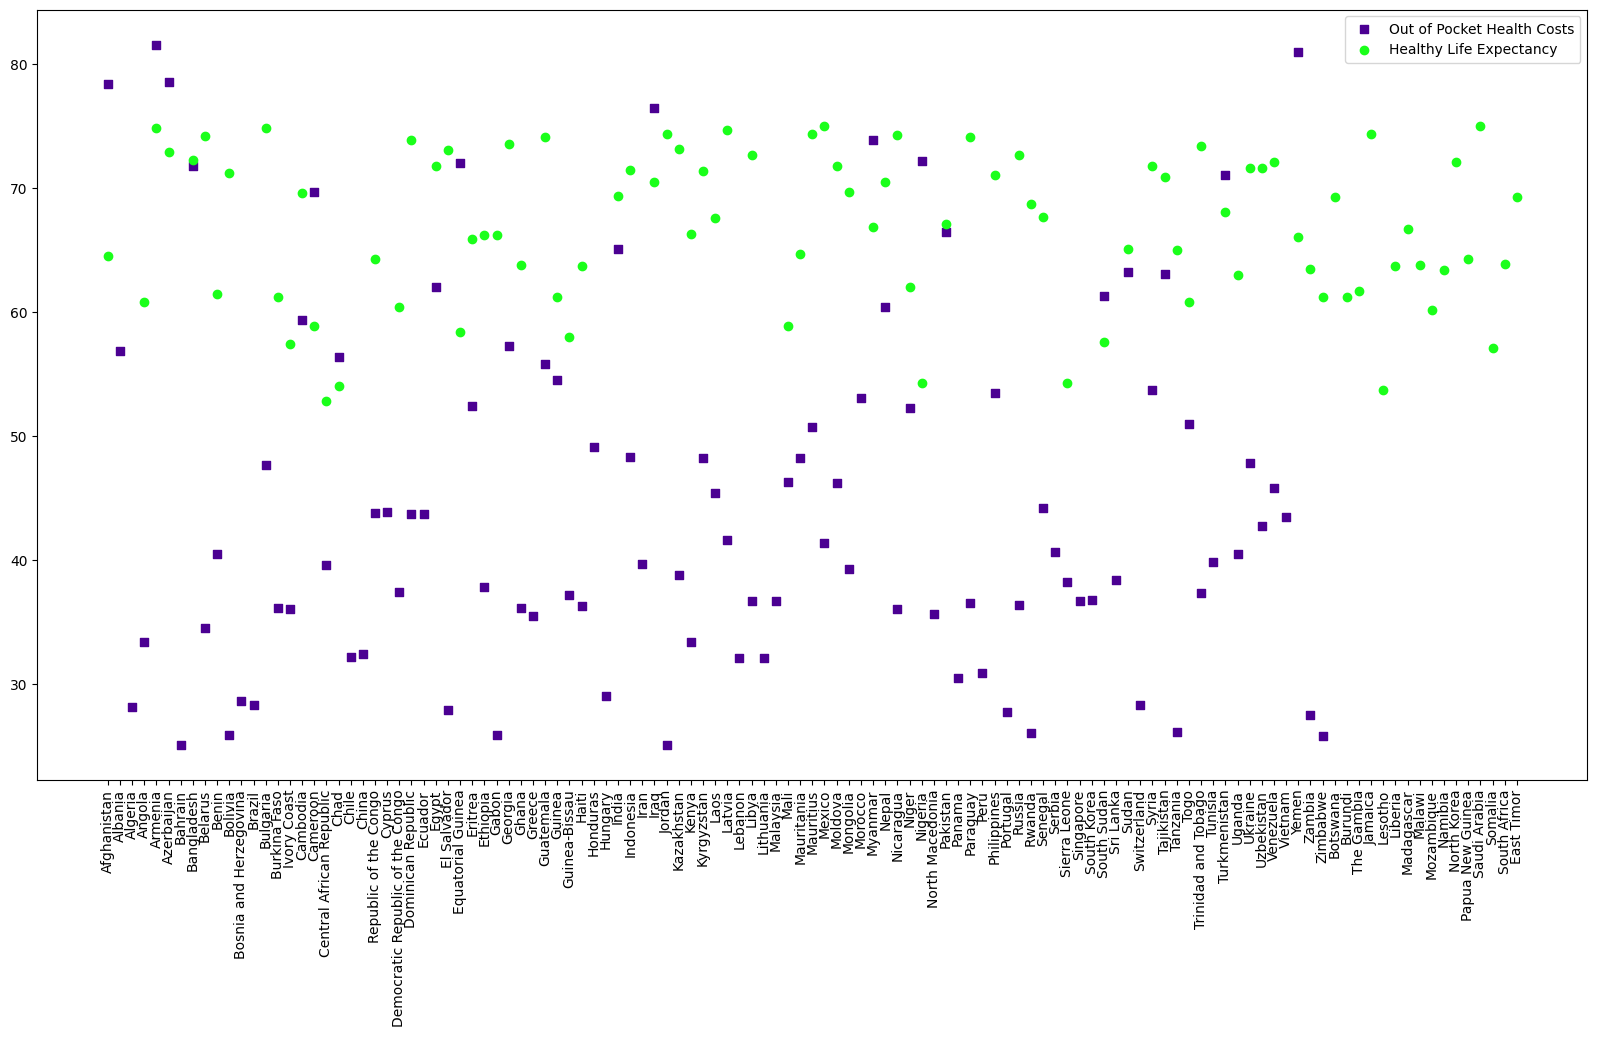

In [33]:
gci_data['population'] = gci_data['population'].astype(int)
gci_data = gci_data[gci_data['population'] > 1000000]
gci_data

gci_data2 = gci_data[~gci_data['out_of_pocket_health_expenditure'].isin(['No data'])]
gci_data2['out_of_pocket_health_expenditure'] = gci_data2['out_of_pocket_health_expenditure'].astype(float)
gci_data3 = gci_data[~gci_data['life_expectancy'].isin(['No data'])]
gci_data3['life_expectancy'] = gci_data3['life_expectancy'].astype(float)

health_cost = gci_data2[gci_data2['out_of_pocket_health_expenditure'] > 25]
life_span = gci_data3[gci_data3['life_expectancy'] <= 75]


plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(health_cost['country'], health_cost['out_of_pocket_health_expenditure'], label='Out of Pocket Health Costs', color='#4B0092', marker='s')
plt.scatter(life_span['country'], life_span['life_expectancy'], label='Healthy Life Expectancy', color='#1AFF1A')
plt.legend()
plt.show()


Suicide rate and happiness score- low happiness scores do not necessarily contribute to suicide rates. Although the highest suicidest rate (40) went with a lower end happiness rate of 5, higher happiness ranking of 7 had suicide rates of 27 and 33, which was not far off 28, 30 and 32 which were also around a ranking of 5. (Rate per 100k)

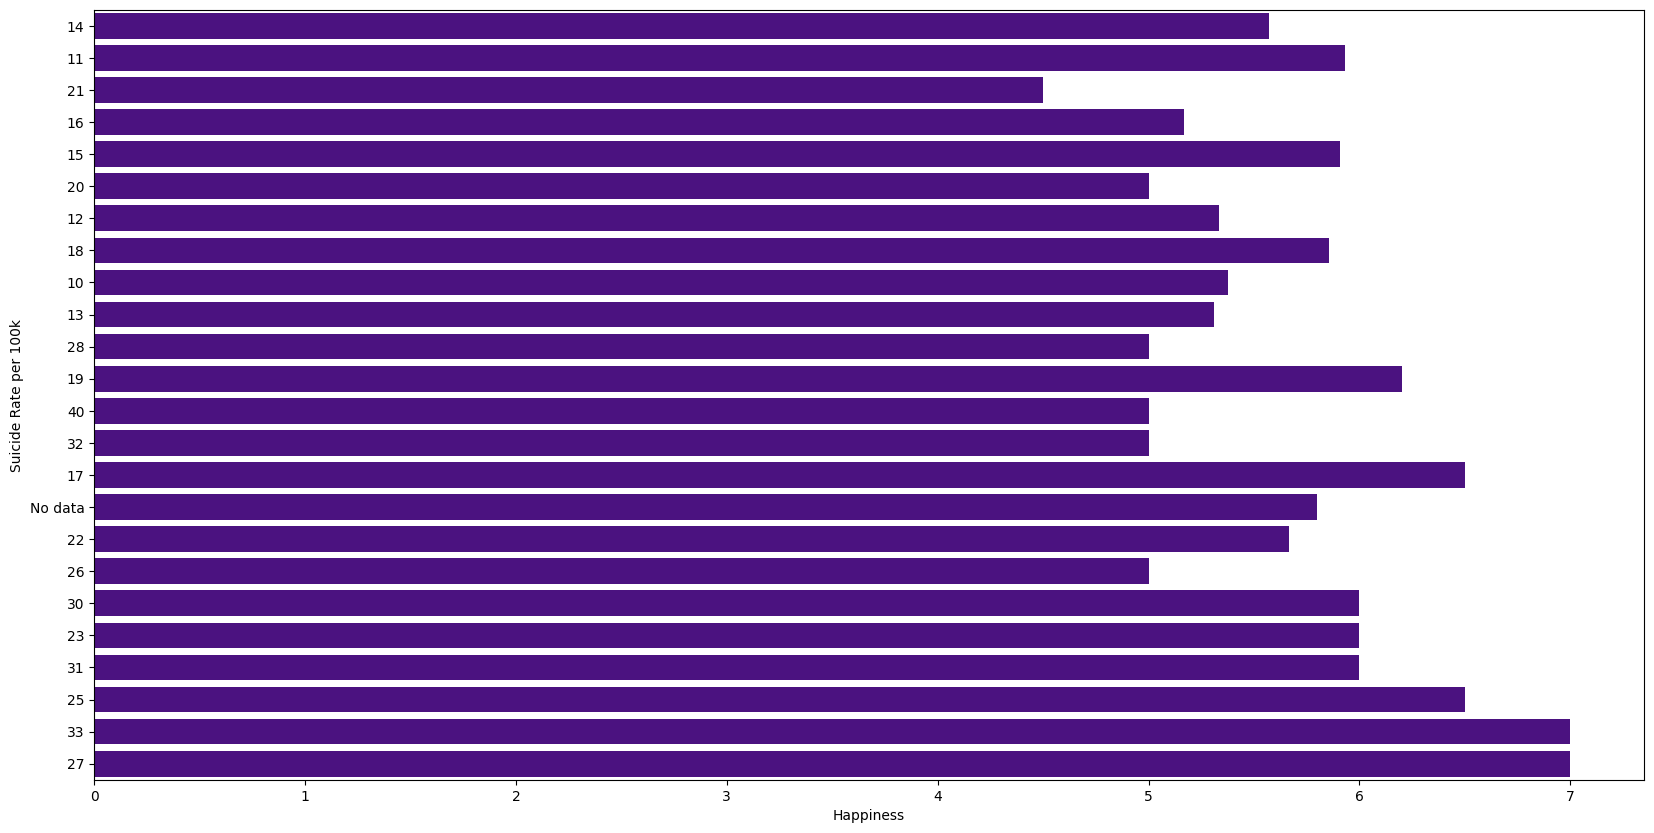

In [ ]:
"""Filtering out columns suicide_rate and happiness_score with no data for them to be turned into integers or floats."""
life_death_data2 = life_death_data[~life_death_data['suicide_rate'].isin(['No data'])]
life_death_data2 = life_death_data[~life_death_data['happiness_score'].isin(['No data'])]

life_death_data2 = life_death_data2.map(lambda x: int(round(x, 0)) if isinstance(x, (int, float)) else x)

plt.figure(figsize=(20,10))
order = life_death_data2.sort_values('happiness_score').suicide_rate
sns.barplot(x='happiness_score', y='suicide_rate', data=life_death_data2, errorbar=None, color='#4B0092', order=order)
plt.xlabel('Happiness')
plt.ylabel('Suicide Rate per 100k')
plt.show()

Fertility rate and happiness scores suggest that overall low happiness creates higher ferility rates (reproductive behavior). The world national average is 2.7.

In [ ]:
"""Finding the average fertility rate"""
world_rate = life_death_data2['fertility_rate'].mean()
world_rate

np.float64(2.7253521126760565)

Unhappy people reproduce more.

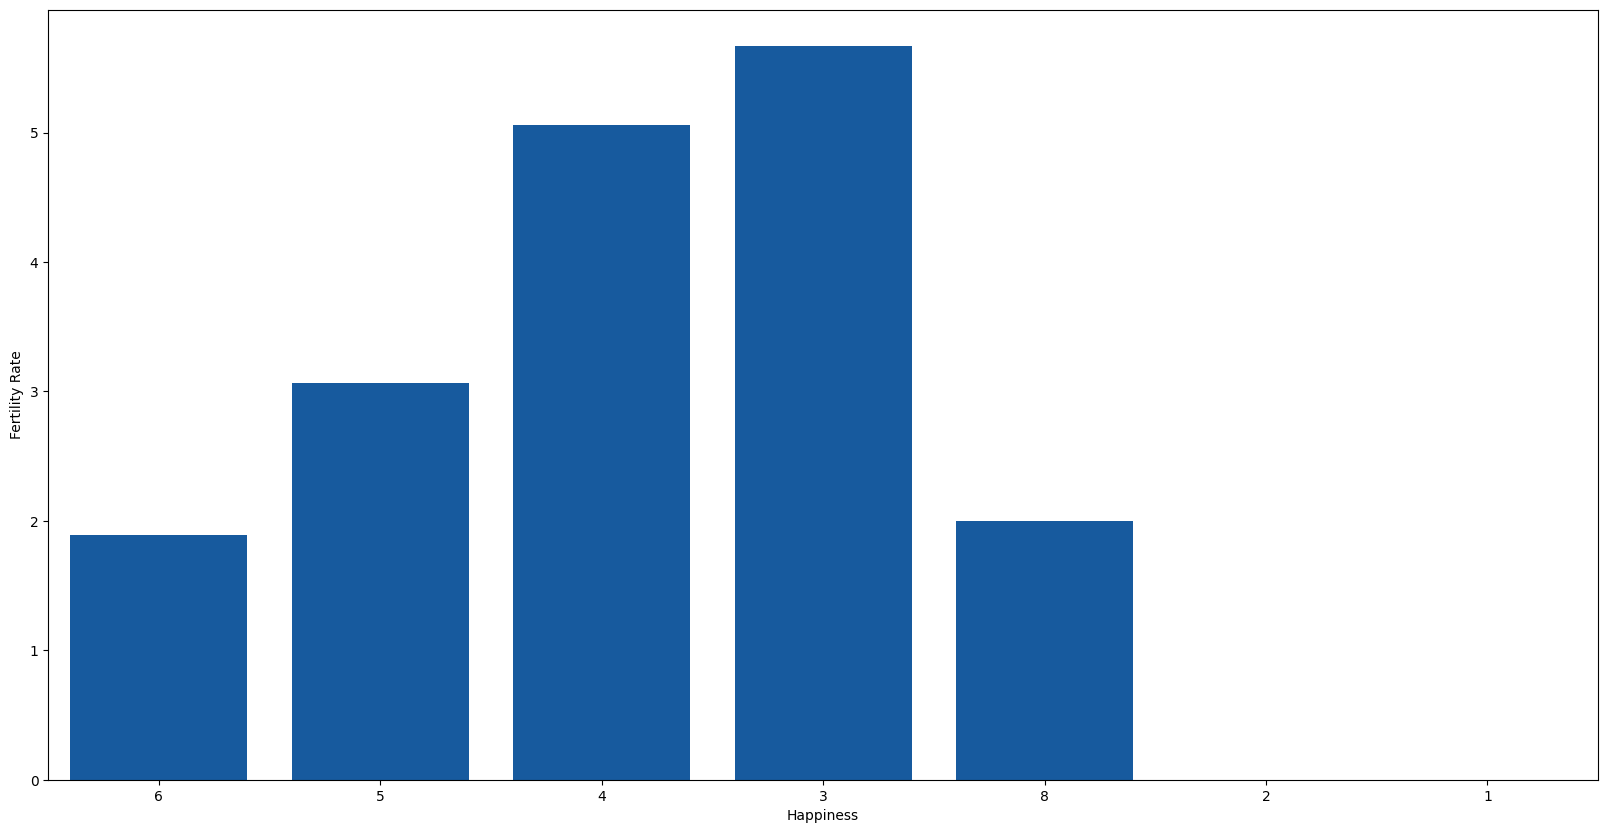

In [36]:
plt.figure(figsize=(20,10))
order = life_death_data2.sort_values('happiness_score').fertility_rate
sns.barplot(x='happiness_score', y='fertility_rate', data=life_death_data2, errorbar=None, color='#005AB5', order=order)
plt.xlabel('Happiness')
plt.ylabel('Fertility Rate')
plt.show()

Exploring the least happiest nations. These nations all have a happiness score of 3 or 4. There are 20 nations on this list. They also have lower life expectancy as the world average male avg is 72 and female avg is 77. The expectancy worldwide in 2023 was 73.5.

In [ ]:
"""Finding the mean of both male and female life expectancy"""
male_mean = life_death_data2['male_life_expectancy'].mean()
male_mean
female_mean = life_death_data2['female_life_expectancy'].mean()
female_mean


np.float64(77.15492957746478)

In [ ]:
"""Finding the combing expectancy and adding it into a new column"""
life_death_data2['combined_expectancy'] = (life_death_data2['male_life_expectancy'] + life_death_data2['female_life_expectancy']) / 2


People in unhappy nations die earlier.

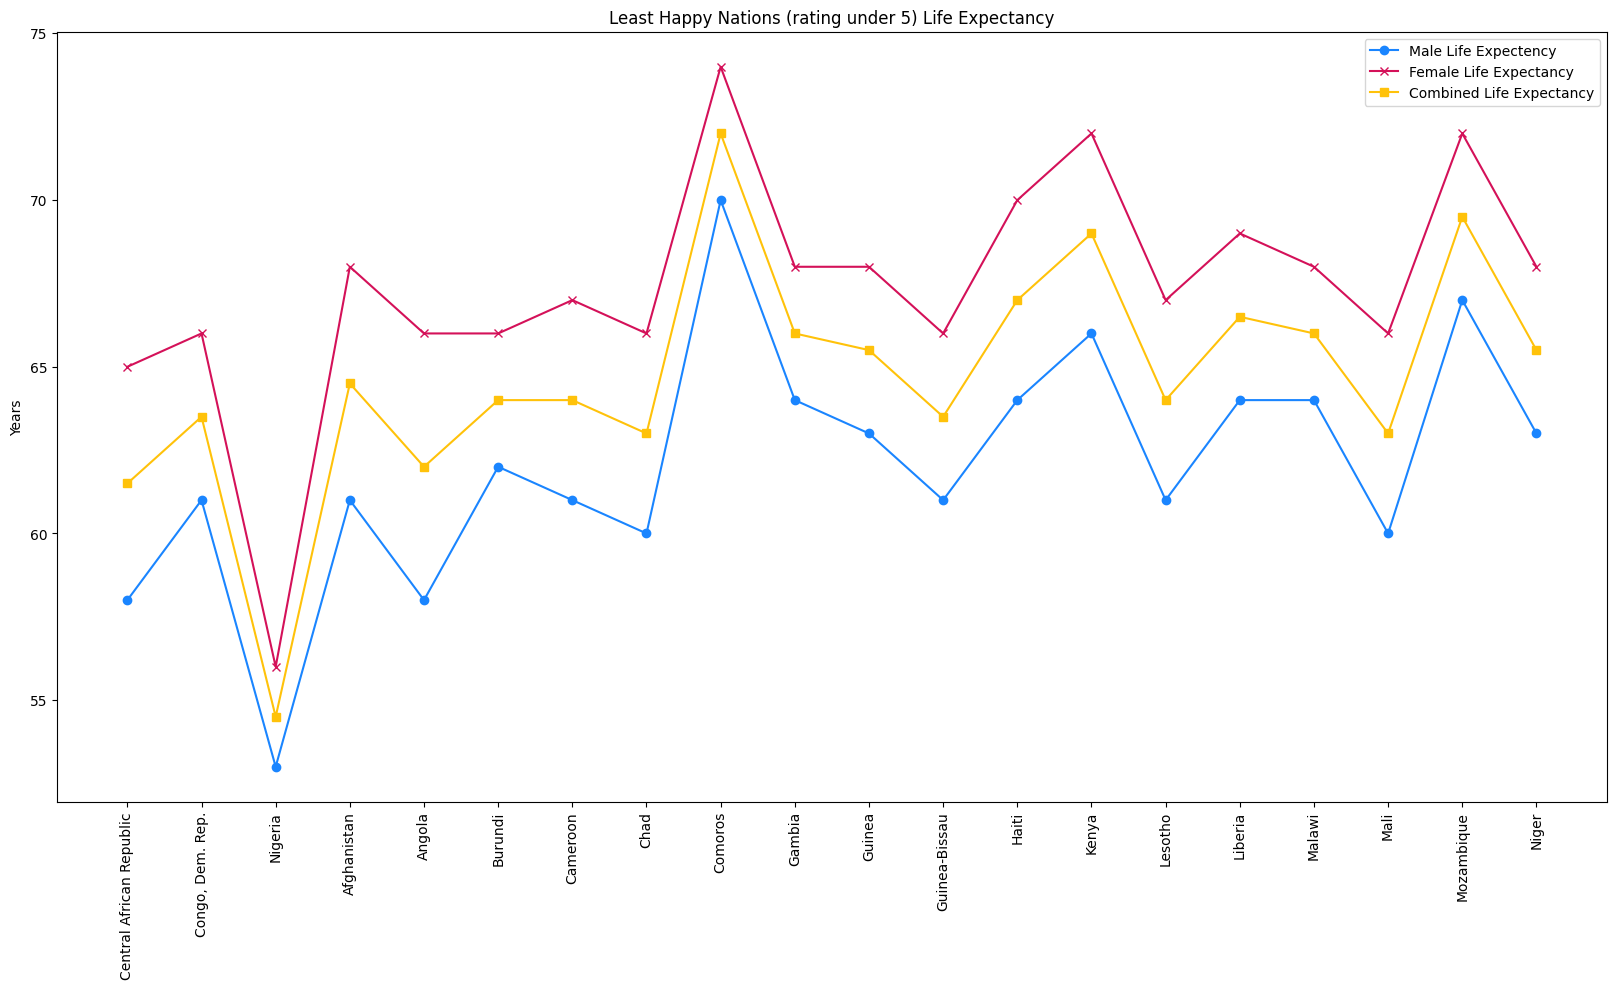

In [39]:
bottom_20 = life_death_data2.nsmallest(20, 'happiness_score')
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(bottom_20['country'], bottom_20['male_life_expectancy'], label= 'Male Life Expectency', color='#1A85FF', marker='o')
plt.plot(bottom_20['country'], bottom_20['female_life_expectancy'], label='Female Life Expectancy', color='#D41159', marker='x')
plt.plot(bottom_20['country'], bottom_20['combined_expectancy'], label='Combined Life Expectancy', color='#FFC20A', marker='s')


plt.legend()
plt.ylabel('Years')
plt.title('Least Happy Nations (rating under 5) Life Expectancy')
plt.show()

Year by year happiness report on any country in the list, using input.

zimbabwe


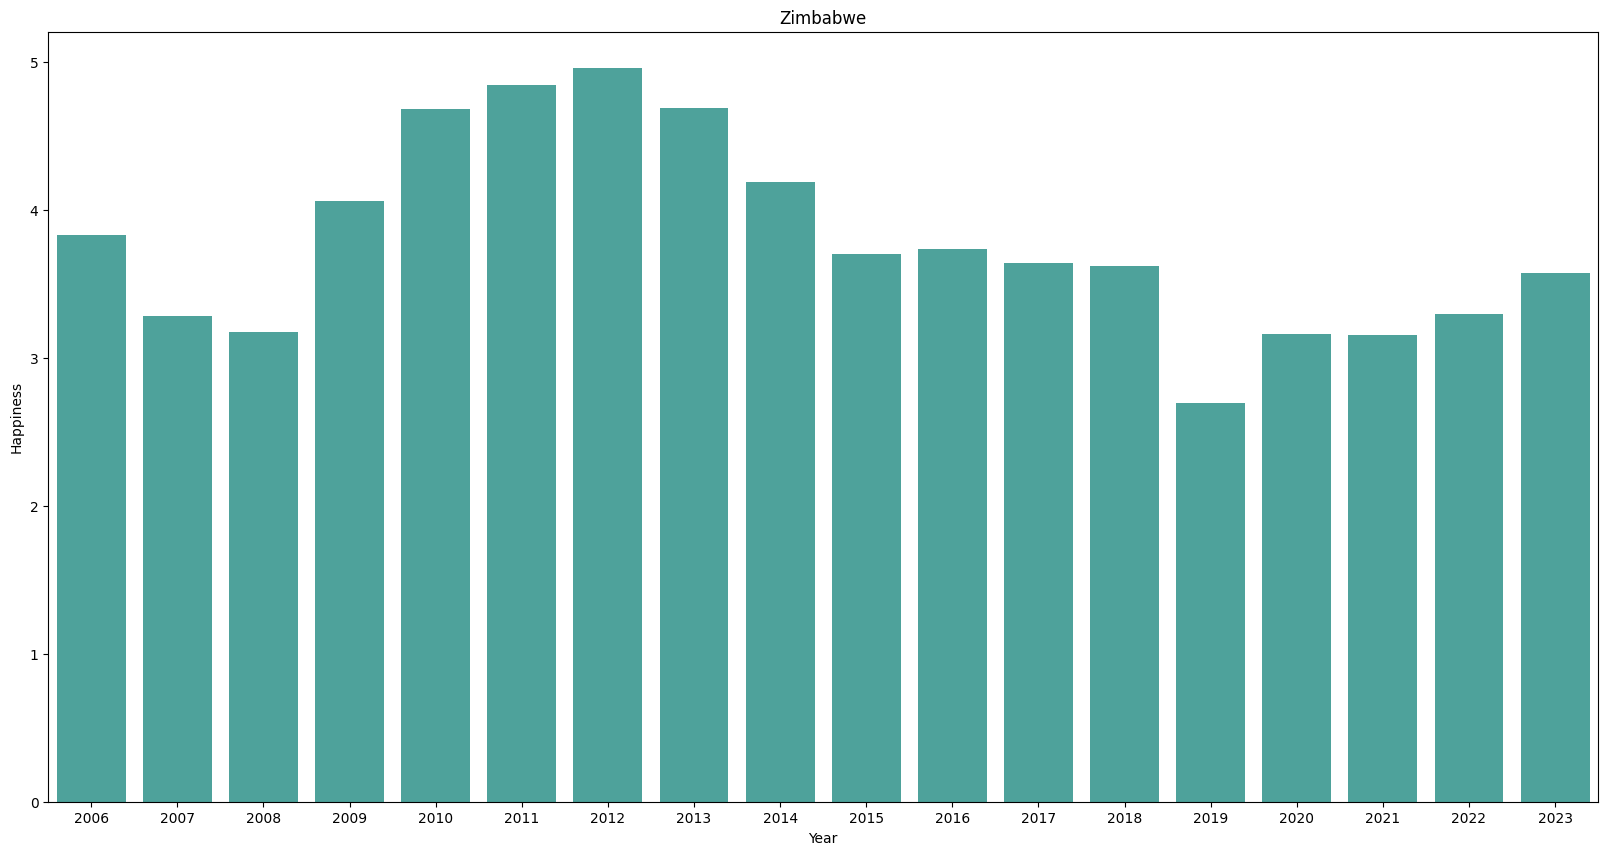

In [40]:
def check_country(name: str) -> bool:
    name = name.title()
    if (w_h_data['country_name'] == name).any():
        country_input = name.title()
        # print(country_input)
        return country_input
    
    else:
        print("That does not exist on the list, please try again.")
        

country_input = input("What country would you like to see a happiness report on?")
check_country(country_input)

w_h_data2 = w_h_data[w_h_data['country_name'] == country_input.title()]
print(country_input)
plt.figure(figsize=(20,10))
ax = sns.barplot(x='year', y='happiness_score', data=w_h_data2, color='#40B0A6', errorbar=None)
ax.set_xlabel("Year")
ax.set_ylabel("Happiness")
plt.title(country_input.title())
plt.show()

while True:
    answer = input("Would you like to try another country? y/n").lower()
    if answer in "y":
        check_country(country_input)
    elif answer in "n":
        break
    else:
        print("Try again")

GDP deflator is a price index that measures the average price of all goods and services produced in an economy. Simply put, it helps show whether changes in GDP are due to increased production or higher prices. A positive GDP deflator shows inflation. Most countries saw a drop in inflation in 2020 due to COVID, with spikes both before and after. Anything higher than about 3% is considered to be high. Some countries also see hyperinflation or deflation. Hyperinflation can be disasterous to the economy as it is hard to bring the ecomony back to managable levels. Deflation causes falling prices and people tend to hold of on purchasing things, which stagnates the economy.

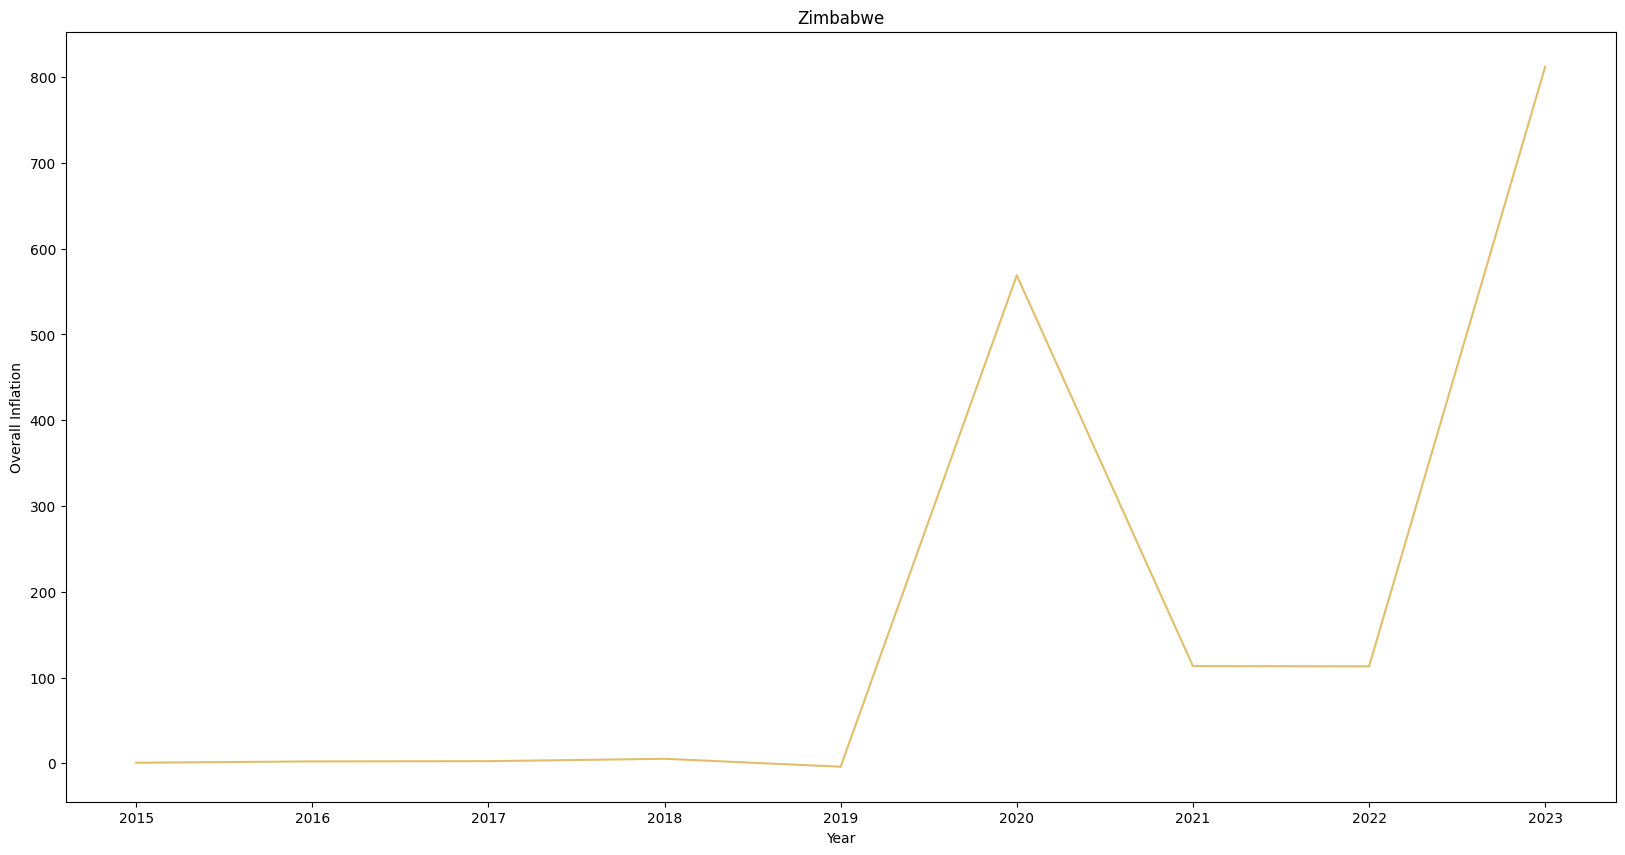

In [41]:
def check_country2(name2: str) -> bool:
    name2 = name2.title()
    if (inf_data['country'] == name2).any():
        country_input2 = name2.title()
        # print(country_input)
        return country_input2
    
    else:
        print("That does not exist on the list, please try again.")

country_input2 = input("What country would you like to see a inflation report on?")
check_country(country_input2)

inf_data2 = inf_data[inf_data['country'] == country_input2.title()]
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='year', y='gdp_deflator_index', data=inf_data2, color='#E1BE6A', errorbar=None)
ax.set_xlabel("Year")
ax.set_ylabel("Overall Inflation")
plt.title(country_input2.title())
plt.show()

while True:
    answer = input("Would you like to try another country? y/n").lower()
    if answer in "y":
        check_country2(country_input2)
    elif answer in "n":
        break
    else:
        print("Try again")

The happinest nations feel they have a lot of freedom of choice while perceptions of corrution vary widely.
For the unhappy nations, perception of corruption is high while freedom of choice varies widely.

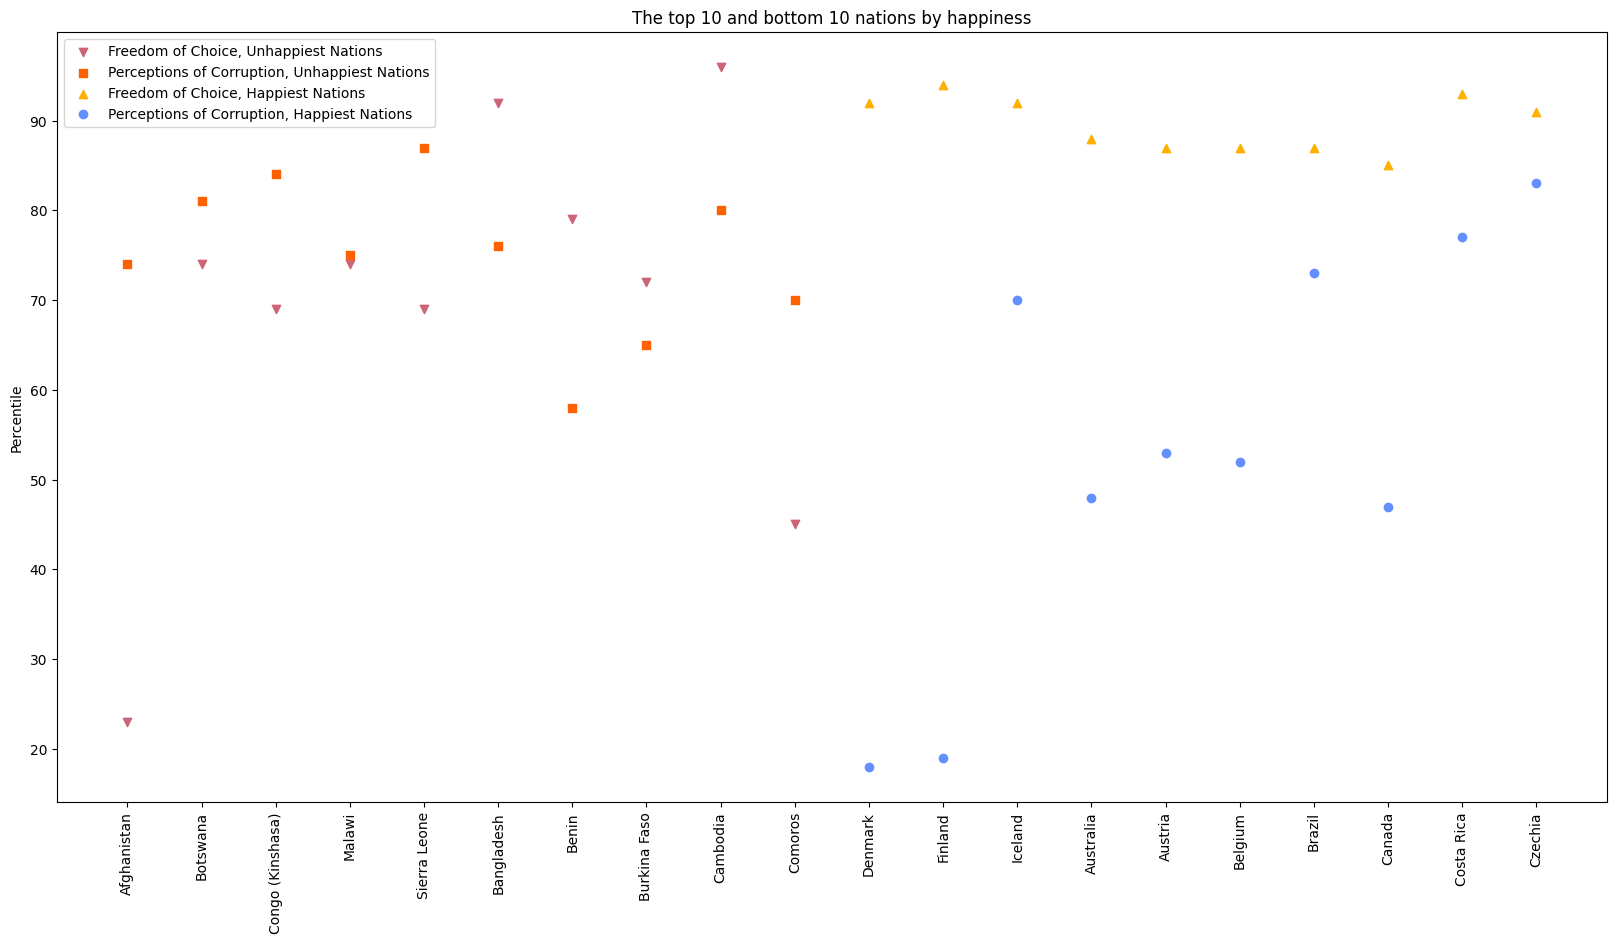

In [43]:
"""Creating a function to ensure that this only runs once even if all the code runs again. This function changes the original data from a decimal to a percentage by multiplying by 100. If this runs more than once, it will scew the numbers."""

fun_ran = False

def make_percent():
    global fun_ran
    if not fun_ran:
        w_h_data['freedom_of_choice'] = w_h_data['freedom_of_choice'] *100
        w_h_data['perceptions_of_corruption'] = w_h_data['perceptions_of_corruption'] *100
        w_h_data['generosity'] = w_h_data['generosity'] * 100
    
make_percent()

w_h_data2 = w_h_data[~w_h_data['freedom_of_choice'].isin(['No data'])]
w_h_data2 = w_h_data[~w_h_data['perceptions_of_corruption'].isin(['No data'])]
w_h_data2 = w_h_data2.map(lambda x: int(round(x, 0)) if isinstance(x, (int, float)) else x)

bottom_10_group = w_h_data2[w_h_data2['year'] == 2023]
bottom_10 = bottom_10_group.nsmallest(10, 'happiness_score')
top_10_group = w_h_data2[w_h_data2['year'] == 2023]
top_10 = top_10_group.nlargest(10, 'happiness_score')
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(bottom_10['country_name'], bottom_10['freedom_of_choice'], label='Freedom of Choice, Unhappiest Nations',color='#CC6677', marker='v')
plt.scatter(bottom_10['country_name'], bottom_10['perceptions_of_corruption'], label='Perceptions of Corruption, Unhappiest Nations',color='#FE6100', marker='s')
plt.scatter(top_10['country_name'], top_10['freedom_of_choice'], label='Freedom of Choice, Happiest Nations',color='#FFB000', marker='^')
plt.scatter(top_10['country_name'], top_10['perceptions_of_corruption'], label='Perceptions of Corruption, Happiest Nations',color='#648FFF', marker='o')
plt.ylabel('Percentile')
plt.legend()
plt.plot()
plt.title('The top 10 and bottom 10 nations by happiness')
plt.show()



Filtering by 2023 for SQL tables (WHDATA and WHI)

In [44]:
w_h_data_2023 = w_h_data[(w_h_data['year'] == 2023)]
w_h_data_2023

index,country_name,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_of_choice,generosity,perceptions_of_corruption,positive_affect,negative_affect
14,Afghanistan,2023,1.445909,7.5856,0.368478,55.200001,22.83012,No dataNo dataNo dataNo dataNo dataNo dataNo d...,73.847091,0.260513,0.460167
30,Albania,2023,5.444691,9.688706,0.690753,69.199997,87.154549,6.78853,85.542506,0.597349,0.314227
63,Argentina,2023,6.393229,9.993596,0.892118,67.300003,83.168375,-12.906091,84.609353,0.720122,0.301162
80,Armenia,2023,5.67909,9.729613,0.819338,68.199997,81.937629,-17.944408,68.070894,0.574717,0.422631
97,Australia,2023,7.024582,10.846434,0.89646,71.199997,87.576878,18.730904,48.158047,0.731053,0.248163
...,...,...,...,...,...,...,...,...,...,...,...
2295,Venezuela,2023,5.765363,No data,0.884668,63.700001,75.653023,No dataNo dataNo dataNo dataNo dataNo dataNo d...,82.53929,0.757685,0.300038
2313,Vietnam,2023,6.325115,9.392351,0.844905,65.699997,95.556003,-15.911365,65.527457,0.710068,0.11951
2327,Yemen,2023,3.531574,No data,0.824958,56.599998,58.272427,No dataNo dataNo dataNo dataNo dataNo dataNo d...,77.146351,0.446534,0.340794
2344,Zambia,2023,3.685568,8.115053,0.664099,56.099998,85.400444,9.237672,81.419057,0.652999,0.359132


In [45]:
inf_data_2023 = inf_data[(inf_data['year'] == 2023)]
inf_data_2023

index,country,year,energy_inflation,food_inflation,gdp_deflator_index,score,gdp_per_capita,freedom_to_make_life_choices
8,Afghanistan,2023,No data,No data,No data,1.859,0.645,0.0
17,Albania,2023,-5.068636,No data,5.194269,5.277,1.449,0.549
26,Algeria,2023,1.487978,13.256373,-0.429629,5.329,1.353,0.252
39,Argentina,2023,110.883892,144.440149,112.264944,6.024,1.59,0.587
48,Armenia,2023,No data,-0.49482,2.818734,5.342,1.466,0.551
...,...,...,...,...,...,...,...,...
1195,Uruguay,2023,No data,8.737705,4.165137,6.494,1.617,0.683
1204,Uzbekistan,2023,No data,12.054104,12.233839,6.014,1.227,0.74
1213,Vietnam,2023,6.527897,3.432899,1.920311,5.763,1.349,0.741
1222,Zambia,2023,7.893496,12.43913,6.671777,3.982,0.914,0.545


Converting dataframes to SQL. Due to the country names being the only unique column, I made the country_name in the world_happiness table the primary key and the country columns the foreign keys in the other tables. This meant I had to generate an integer for the primary keys in the other tables. 

In [50]:
conn = sqlite3.connect("happiness_data.db")
cursor = conn.cursor()


cursor.execute("""
CREATE TABLE IF NOT EXISTS world_happiness (
    country_name TEXT PRIMARY KEY,
    year INTEGER NOT NULL,
    happiness_score REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    social_support REAL NOT NULL,
    healthy_life_expectancy_at_birth REAL NOT NULL,
    freedom_of_choice REAL NOT NULL,
    generosity REAL NOT NULL,
    perceptions_of_corruption REAL NOT NULL,
    positive_affect REAL NOT NULL,
    negative_affect REAL NOT NULL
);
""")

w_h_data_2023.to_sql("world_happiness", conn, if_exists="replace", index=False)
conn.commit()
print(pd.read_sql_query("SELECT * FROM  world_happiness", conn))


    country_name  year  happiness_score gdp_per_capita  social_support  \
0    Afghanistan  2023         1.445909         7.5856        0.368478   
1        Albania  2023         5.444691    9.688706398        0.690753   
2      Argentina  2023         6.393229    9.993596077        0.892118   
3        Armenia  2023         5.679090    9.729613304        0.819338   
4      Australia  2023         7.024582    10.84643364        0.896460   
..           ...   ...              ...            ...             ...   
133    Venezuela  2023         5.765363        No data        0.884668   
134      Vietnam  2023         6.325115    9.392351151        0.844905   
135        Yemen  2023         3.531574        No data        0.824958   
136       Zambia  2023         3.685568    8.115053177        0.664099   
137     Zimbabwe  2023         3.572386    7.678589821        0.693817   

    healthy_life_expectancy_at_birth freedom_of_choice  \
0                        55.20000076        22.830119

In [47]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS expectancy (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country TEXT NOT NULL,
    male_life_expectancy REAL NOT NULL,
    female_life_expectancy REAL NOT NULL, 
    happiness_score REAL NOT NULL,
    fertility_rate REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    suicide_rate REAL NOT NULL,
    FOREIGN KEY (country) REFERENCES world_happiness(country_name)
    );
""")

life_death_data.to_sql("expectancy", conn, if_exists="replace", index=False)
conn.commit()
print(pd.read_sql_query("SELECT * FROM  expectancy", conn))

                  country male_life_expectancy female_life_expectancy  \
0             Afghanistan                 60.6                   68.2   
1                 Albania                 74.8                   81.3   
2                 Algeria                 73.3                   78.9   
3                 Andorra                 81.7                   84.8   
4                  Angola                 58.1                   65.6   
..                    ...                  ...                    ...   
145           Switzerland              No data                No data   
146              Thailand              No data                No data   
147  United Arab Emirates                 76.3                   80.6   
148        United Kingdom                 79.0                   83.0   
149         United States                 76.1                   81.1   

    happiness_score fertility_rate gdp_per_capita suicide_rate  
0             3.794            4.7          1,105         

In [51]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS inflation (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country TEXT NOT NULL,
    year INTEGER NOT NULL,
    energy_consumer_price_inflation REAL NOT NULL, 
    food_consumer_price_inflation REAL NOT NULL,
    gdp_deflator_index_growth_rate REAL NOT NULL,
    score REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    freedom_to_make_life_choices REAL NOT NULL,
    FOREIGN KEY (country) REFERENCES world_happiness(country_name)
);
""")

inf_data_2023.to_sql("inflation", conn, if_exists="replace", index=False)
conn.commit()
print(pd.read_sql_query("SELECT * FROM  inflation", conn))

         country  year  energy_inflation      food_inflation  \
0    Afghanistan  2023           No data             No data   
1        Albania  2023  -5.0686363666852             No data   
2        Algeria  2023  1.48797780341691    13.2563729243281   
3      Argentina  2023  110.883891648727    144.440148777639   
4        Armenia  2023           No data  -0.494819884451163   
..           ...   ...               ...                 ...   
117      Uruguay  2023           No data    8.73770534123861   
118   Uzbekistan  2023           No data    12.0541035217409   
119      Vietnam  2023  6.52789701257877    3.43289943345136   
120       Zambia  2023  7.89349594026239    12.4391298706915   
121     Zimbabwe  2023  115.380648422666             No data   

     gdp_deflator_index  score  gdp_per_capita  freedom_to_make_life_choices  
0               No data  1.859           0.645                         0.000  
1       5.1942692701798  5.277           1.449                         0.

In [52]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS global (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country TEXT NOT NULL,
    armed_forces_size REAL NOT NULL,
    birth_rate REAL NOT NULL, 
    fertility_rate REAL NOT NULL,
    gdp REAL NOT NULL,
    primary_education_enrollment REAL NOT NULL,
    tertiary_education_enrollment REAL NOT NULL,
    infant_mortality REAL NOT NULL,
    life_expectancy REAL NOT NULL, 
    maternal_mortality_ratio REAL NOT NULL,
    minimum_wage REAL NOT NULL,
    out_of_pocket_health_expenditure REAL NOT NULL,
    physicians_per_thousand REAL NOT NULL,
    population INTEGER NOT NULL,
    labor_force_participation REAL NOT NULL, 
    tax_revenue REAL NOT NULL,
    unemployment_rate REAL NOT NULL, 
    FOREIGN KEY (country) REFERENCES world_happiness(country_name)
);
""")

gci_data.to_sql("global", conn, if_exists="replace", index=False)
conn.commit()
print(pd.read_sql_query("SELECT * FROM  global", conn))


         country armed_forces_size birth_rate fertility_rate            gdp  \
0    Afghanistan           323,000      32.49           4.47   19101353833    
1        Albania             9,000      11.78           1.62   15278077447    
2        Algeria           317,000      24.28           3.02  169988236398    
3         Angola           117,000      40.73           5.52   94635415870    
4      Argentina           105,000      17.02           2.26  449663446954    
..           ...               ...        ...            ...            ...   
150    Venezuela           343,000      17.88           2.27  482359318768    
151      Vietnam           522,000      16.75           2.05  261921244843    
152        Yemen            40,000      30.45           3.79   26914402224    
153       Zambia            16,000      36.19           4.63   23064722446    
154     Zimbabwe            51,000      30.68           3.62   21440758800    

    primary_education_enrollment tertiary_education

In [ ]:
""""Making a function to return and print information from queries that are created and ran."""
def query(query: str):
    return pd.read_sql(query, conn)

The happiness score of countries with low minimum wage and high cost of health care (by joining of the expectancy and global tables).

In [54]:
expenses = """
    SELECT expectancy.happiness_score, global.country
    FROM expectancy
    JOIN global
    ON expectancy.country = global.country
    WHERE out_of_pocket_health_expenditure > 25
    AND minimum_wage < 10;
"""
query(expenses)

,happiness_score,country
0,3.794,Afghanistan
1,4.959,Albania
2,5.605,Algeria
3,4.105,Angola
4,4.853,Armenia
5,5.129,Azerbaijan
6,4.527,Bangladesh
7,5.892,Belarus
8,4.923,Benin
9,5.139,Bolivia


Joining the world happiness and inflation data tables based on the primary key of country names, comparing low generosity and high food inflation with happiness. 
As you can see, these 2 things do not necessarily make people unhappy, as several countries rank in the 6-7+ happiness range, even with negative generosity scores and food inflation of more than 20%. 

In [55]:
inflation = """
    SELECT world_happiness.country_name, world_happiness.happiness_score
    FROM world_happiness
    INNER JOIN inflation
    ON world_happiness.country_name = inflation.country
    WHERE world_happiness.generosity < 0 AND
    inflation.food_inflation > 20 AND          
    inflation.year = 2023 AND
    world_happiness.year = 2023;
"""
query(inflation)

,country_name,happiness_score
0,Bolivia,5.859886
1,Brazil,6.552691
2,Costa Rica,7.384069
3,Dominican Republic,5.921262
4,Ecuador,5.851754
5,El Salvador,6.481847
6,Finland,7.698929
7,Gabon,5.104125
8,Georgia,5.350635
9,Hungary,5.965178


Countries with high suicide rates. (More than 40 per 100k)

In [56]:
suicide ="""
    SELECT expectancy.country, expectancy.happiness_score, global.population FROM expectancy
    LEFT JOIN global
    ON expectancy.country = global.country
    WHERE suicide_rate > 40;
"""
query(suicide)

,country,happiness_score,population
0,Brunei,6.298,NaN
1,Cabo Verde,5.507,NaN
2,"Korea, Dem. Rep.",4.687,NaN
3,"Korea, Rep.",5.538,NaN
4,Kosovo,5.362,NaN
5,Kyrgyz Republic,5.136,NaN
6,"Macedonia, FYR",5.526,NaN
7,Pakistan,5.194,216565318.0
8,Qatar,6.42,2832067.0
9,Singapore,6.71,5703569.0


Even countries with higher learning (tertiary is anything beyond high school level learning) can experience high unemployment rates. Worldwide average for 2023 was just under 5%. Although it does seem most countries that have higher enrollment levels, are happier despite their enemployment rates. 

In [57]:
education_vs_unemployment ="""
    SELECT  global.country, world_happiness.happiness_score, global.tertiary_education_enrollment, global.unemployment_rate FROM world_happiness
    LEFT JOIN global
    ON world_happiness.country_name = global.country
    WHERE world_happiness.year = 2023 AND
    global.unemployment_rate > 5
    ORDER BY happiness_score DESC;
"""
query(education_vs_unemployment)



,country,happiness_score,tertiary_education_enrollment,unemployment_rate
0,Finland,7.698929,88.20,6.59
1,Sweden,7.160777,67.00,6.48
2,Australia,7.024582,113.10,5.27
3,Saudi Arabia,6.953374,68.00,5.93
4,Belgium,6.943599,79.70,5.59
5,Canada,6.841207,68.90,5.56
6,Uruguay,6.661722,63.10,8.73
7,France,6.556921,65.60,8.43
8,Lithuania,6.552654,72.40,6.35
9,Estonia,6.429873,69.60,5.11
